In [ ]:
#importing data
from google.colab import files
mov_upload = files.upload()

Saving movies.dat to movies.dat


In [ ]:
#importing data
from google.colab import files
rat = files.upload()

Saving ratings.dat to ratings (1).dat


In [ ]:
from collections import UserString
#importing data
from google.colab import files
Users = files.upload()

Saving users.dat to users (1).dat


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#reading the movies dataset
mov = pd.read_csv('/content/movies.dat',sep = "::",names=["MovieId","Title" ,"Genres"],engine = 'python',encoding=encoding)
mov.dropna(inplace=True)
mov.head()

,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Try reading the file with different encodings
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = '/content/movies.dat'

for encoding in encodings:
    try:
        mov = pd.read_csv(file_path, sep="::", names=["MovieId", "Title", "Genres"], engine='python', encoding=encoding)
        break  # If the reading is successful, exit the loop
    except UnicodeDecodeError:
        continue  # If there is an encoding error, try the next encoding

# Drop any rows with missing values
mov.dropna(inplace=True)

# Display the first few rows of the dataset
mov.head()


,MovieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
#reading the ratings dataset
rat = pd.read_csv('/content/ratings.dat',sep = "::",names=["Id","MovieId" ,"Rating","TimeStamp"],engine = 'python',encoding=encoding )
rat.dropna(inplace=True)
rat.head()

,Id,MovieId,Rating,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [7]:
#reading the users dataset
users = pd.read_csv('/content/users.dat',sep = "::",names=["Id","Gender" ,"Age","Occupation","Zip-code"],engine = 'python',encoding=encoding )
users.dropna(inplace=True)
users.head()

,Id,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
mov.shape

(3883, 3)

In [9]:
rat.shape

(1000209, 4)

In [10]:
users.shape

(6040, 5)

Merging data

In [11]:
movrat = mov.merge(rat, on="MovieId",how='inner')
movrat.head()

,MovieId,Title,Genres,Id,Rating,TimeStamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [12]:
ratuser = movrat.merge(users, on="Id",how='inner')
ratuser.head()

,MovieId,Title,Genres,Id,Rating,TimeStamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [13]:
ratuser.to_csv("Master.csv")

Data Analysis

In [14]:
ratuser.describe()

,MovieId,Id,Rating,TimeStamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


In [15]:
ratuser.isna().sum()

MovieId       0
Title         0
Genres        0
Id            0
Rating        0
TimeStamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [16]:
ratuser['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

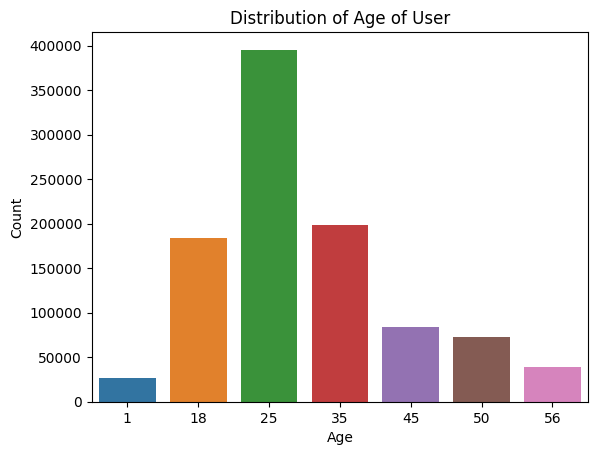

In [17]:
sns.countplot(data=ratuser, x='Age')
# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age of User')

# Show the plot
plt.show()




In [18]:
#user rating of the movie "ToyStory"
TSRating =ratuser[ratuser['Title'].str.contains("Toy Story")==True]
TSRating

,MovieId,Title,Genres,Id,Rating,TimeStamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


import numpy as np
from google.colab import autoviz
df_8098113001172765629 = autoviz.get_df('df_8098113001172765629')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8098113001172765629, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6313863458647266238 = autoviz.get_df('df_6313863458647266238')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6313863458647266238, *['MovieId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8965899944315329838 = autoviz.get_df('df_8965899944315329838')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8965899944315329838, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6234857703078629587 = autoviz.get_df('df_6234857703078629587')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_6234857703078629587, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8519090305267948127 = autoviz.get_df('df_8519090305267948127')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_8519090305267948127, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2980905291599906074 = autoviz.get_df('df_2980905291599906074')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2980905291599906074, *['MovieId'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3072970111338518340 = autoviz.get_df('df_3072970111338518340')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3072970111338518340, *['Id'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6924852800352689037 = autoviz.get_df('df_6924852800352689037')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6924852800352689037, *['Rating'], **{})
chart

import numpy as np
from google.colab import autoviz
df_328333624186596156 = autoviz.get_df('df_328333624186596156')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_328333624186596156, *['Title'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7632881680793876745 = autoviz.get_df('df_7632881680793876745')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_7632881680793876745, *['Gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1052740475811092195 = autoviz.get_df('df_1052740475811092195')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1052740475811092195, *[[['index', 'MovieId'], ['MovieId', 'Id'], ['Id', 'Rating'], ['Rating', 'Age']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_1896168321542680357 = autoviz.get_df('df_1896168321542680357')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_1896168321542680357, *['Title', 'Gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3790580576461494149 = autoviz.get_df('df_3790580576461494149')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3790580576461494149, *['index', 'Title'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_6568713607463088868 = autoviz.get_df('df_6568713607463088868')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_6568713607463088868, *['index', 'Gender'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_3218840352319294852 = autoviz.get_df('df_3218840352319294852')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3218840352319294852, *['MovieId', 'Title'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_477760759815497737 = autoviz.get_df('df_477760759815497737')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_477760759815497737, *['MovieId', 'Gender'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz
df_6366989217408839166 = autoviz.get_df('df_6366989217408839166')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6366989217408839166, *['TimeStamp', 'MovieId', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5100984991355733112 = autoviz.get_df('df_5100984991355733112')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5100984991355733112, *['TimeStamp', 'MovieId', 'Gender'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5499028134477512759 = autoviz.get_df('df_5499028134477512759')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_5499028134477512759, *['TimeStamp', 'Id', 'Title'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6158183992884836974 = autoviz.get_df('df_6158183992884836974')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6158183992884836974, *['TimeStamp', 'Id', 'Gender'], **{})
chart

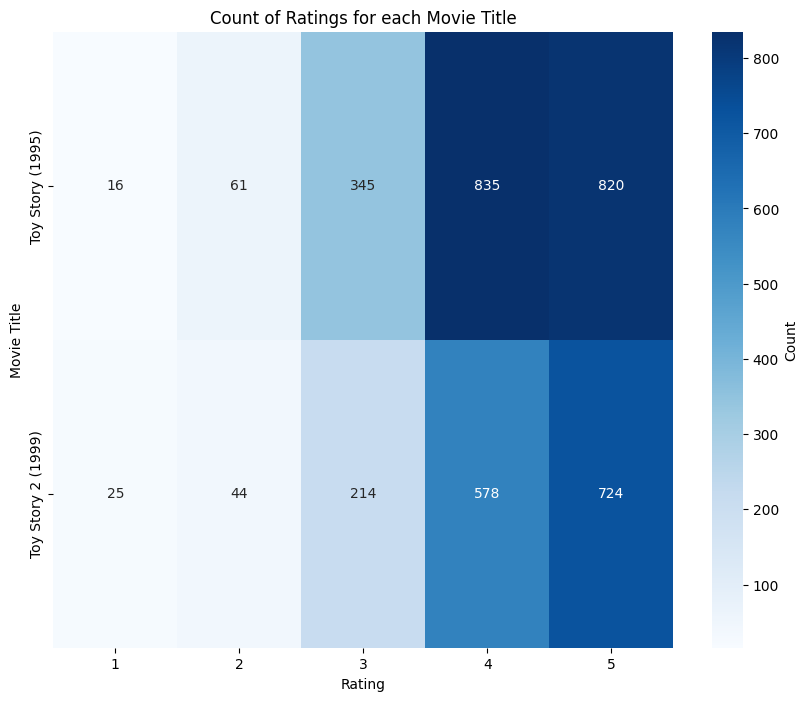

In [19]:
# Group the data by 'Title' and 'Rating' and calculate the size of each group
gp_data = TSRating.groupby(['Title', 'Rating']).size().unstack(fill_value=0)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(gp_data, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Count'})

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.title('Count of Ratings for each Movie Title')

# Show the plot
plt.show()


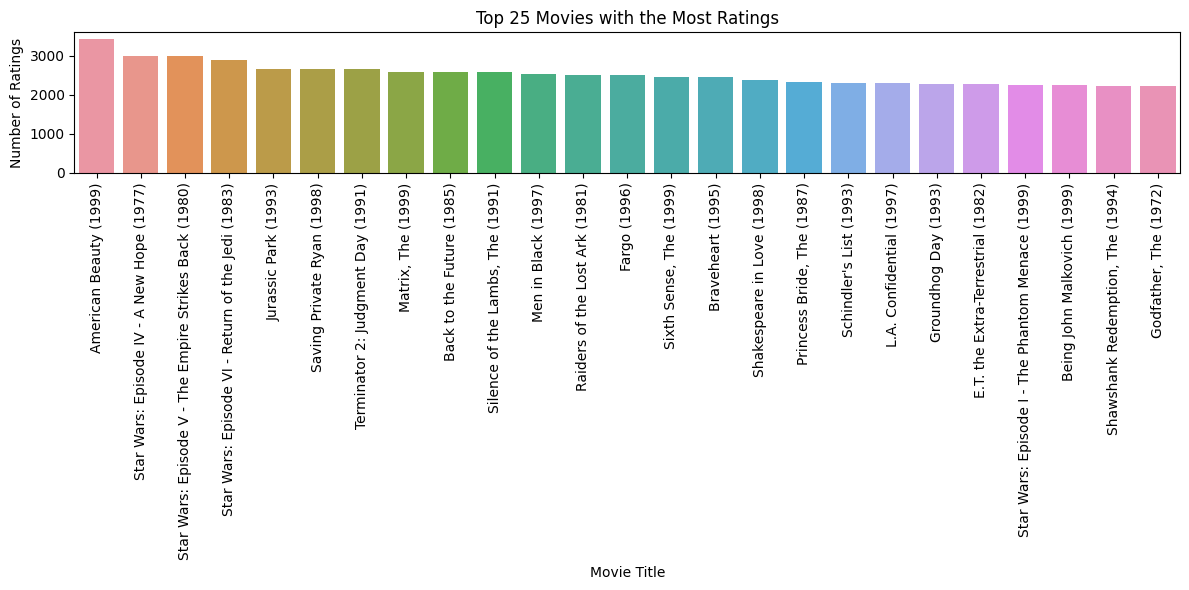

In [20]:
# Group the data by 'Title' and calculate the size of each group
ratings_count = ratuser.groupby('Title').size()
# Sort the movies based on the number of ratings in descending order and select the top 25
top25 = ratings_count.sort_values(ascending=False)[:25]
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top25.index, y=top25.values)

#labels and title
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.title('Top 25 Movies with the Most Ratings')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


In [21]:
# Split the 'Genres' column by '|' to get individual genres for each movie
Gen = ratuser['Genres'].str.split("|")
Gen


0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [22]:
# Create an empty set to store unique genres
listGen = set()

# Loop through each movie's list of genres and add them to the 'listGen' set
for genre in Gen:
    listGen = listGen.union(set(genre))

In [23]:
print(listGen)

{'Horror', 'Adventure', 'Fantasy', 'Sci-Fi', 'Drama', 'Thriller', "Children's", 'Western', 'Animation', 'War', 'Documentary', 'Comedy', 'Action', 'Musical', 'Mystery', 'Film-Noir', 'Romance', 'Crime'}


In [24]:
en = ratuser['Genres'].str.get_dummies("|")
en.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [25]:
ratuser=pd.concat([ratuser,en],axis=1)
ratuser

,MovieId,Title,Genres,Id,Rating,TimeStamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


In [26]:
ratuser.columns

Index(['MovieId', 'Title', 'Genres', 'Id', 'Rating', 'TimeStamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

Features affecting the ratings of any particular movie

In [27]:
ratuser[["Title","Year"]] = ratuser.Title.str.extract("(.)\s\((.d+)", expand=True)
ratuser = ratuser.drop(columns=["Title"])
ratuser.head()

,MovieId,Genres,Id,Rating,TimeStamp,Gender,Age,Occupation,Zip-code,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,NaN
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,0,0,1,0,1,0,0,0,0,NaN
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,NaN
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,...,0,0,0,0,0,1,0,0,0,NaN
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,1,0,NaN


In [29]:
tst = ratuser.groupby('Gender').size().sort_values(ascending = False)[:25]
tst

Gender
M    753769
F    246440
dtype: int64

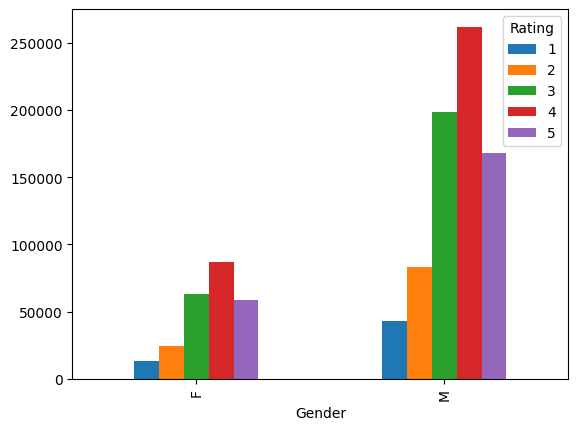

In [31]:
ratuser.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

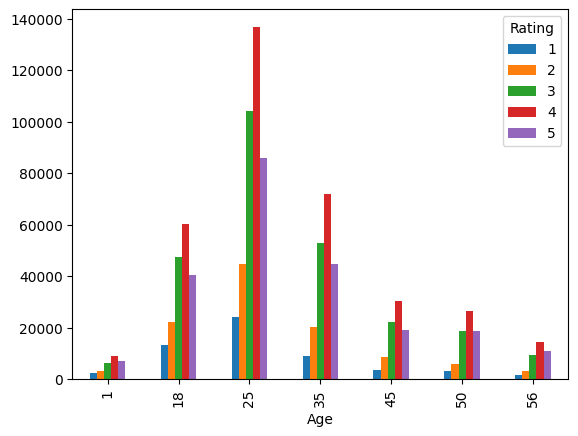

In [32]:
ratuser.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

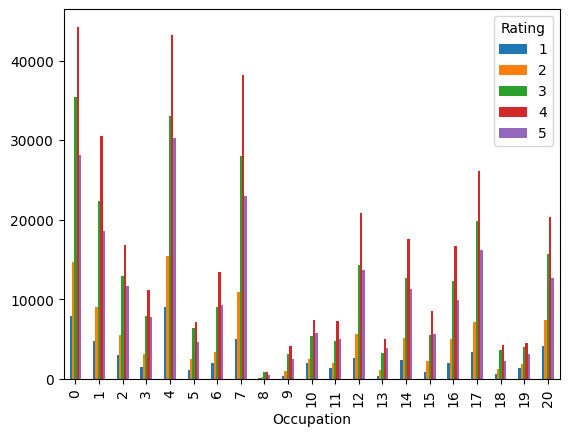

In [33]:
ratuser.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

Model to predict movie ratings

In [47]:
# Select a subset of data for modeling (e.g., first 1000 rows)
f_500 = ratuser[:1000]
# Prepare feature matrix (X) and target variable (y)
x = f_500[['MovieId','Age','Occupation']].values
y= f_500[['Rating']].values


In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [51]:
# Train a Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict on the test set
y_pred_lr = lr.predict(X_test)

In [53]:
# Calculate metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [54]:
# Display results
print("Linear Regression:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression:
Mean Squared Error: 1.1140804043272698
R-squared: -0.011941750327543188


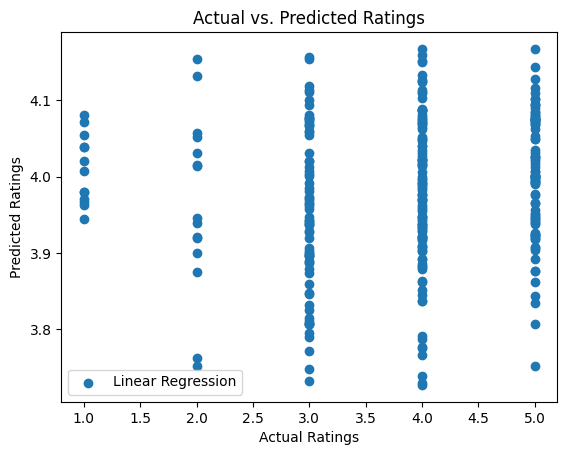

In [55]:
plt.scatter(y_test, y_pred_lr, label='Linear Regression')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.title('Actual vs. Predicted Ratings')
plt.show()